In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [3]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "StudentsPerformance.csv" with length 57021 bytes


In [4]:
uploaded

{'StudentsPerformance.csv': b"gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score\r\nfemale,group B,bachelor's degree,standard,none,72,72,74\r\nfemale,group C,some college,standard,completed,69,90,88\r\nfemale,group B,master's degree,standard,none,90,95,93\r\nmale,group A,associate's degree,free/reduced,none,47,57,44\r\nmale,group C,some college,standard,none,76,78,75\r\nfemale,group B,associate's degree,standard,none,71,83,78\r\nfemale,group B,some college,standard,completed,88,95,92\r\nmale,group B,some college,free/reduced,none,40,43,39\r\nmale,group D,high school,free/reduced,completed,64,64,67\r\nfemale,group B,high school,free/reduced,none,38,60,50\r\nmale,group C,associate's degree,standard,none,58,54,52\r\nmale,group D,associate's degree,standard,none,40,52,43\r\nfemale,group B,high school,standard,none,65,81,73\r\nmale,group A,some college,standard,completed,78,72,70\r\nfemale,group A,master's degree,standard,n

In [5]:
import pandas as pd
import numpy as np
     

In [6]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()
     


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.isnull().sum()
     


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
series = df['math score'].isnull()
df[series]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [10]:
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,standard,none,72,72,74
1,0,group C,some college,standard,completed,69,90,88
2,0,group B,master's degree,standard,none,90,95,93
3,1,group A,associate's degree,free/reduced,none,47,57,44
4,1,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,standard,completed,88,99,95
996,1,group C,high school,free/reduced,none,62,55,55
997,0,group C,high school,free/reduced,completed,59,71,65
998,0,group D,some college,standard,completed,68,78,77


In [11]:
m_avg = df['math score'].mean()
df['math score'].fillna(value = m_avg, inplace=True)

In [12]:
df['math score']

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [13]:
# to delete null values we use dropna
df.dropna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,standard,none,72,72,74
1,0,group C,some college,standard,completed,69,90,88
2,0,group B,master's degree,standard,none,90,95,93
3,1,group A,associate's degree,free/reduced,none,47,57,44
4,1,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,standard,completed,88,99,95
996,1,group C,high school,free/reduced,none,62,55,55
997,0,group C,high school,free/reduced,completed,59,71,65
998,0,group D,some college,standard,completed,68,78,77


<Axes: >

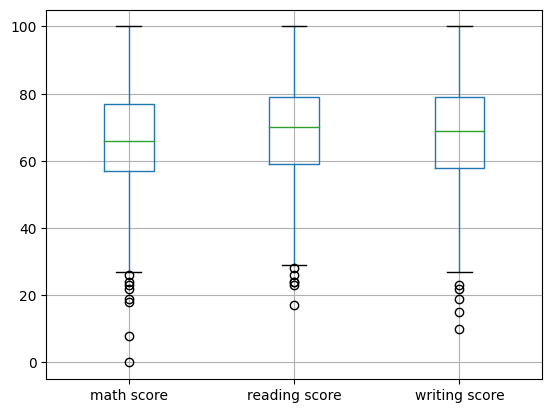

In [14]:
import matplotlib.pyplot as plt
df.boxplot(['math score', 'reading score', 'writing score'])